### Imports secion

In [1]:
import matplotlib
import re
import requests

import matplotlib.pyplot as plt
import pandas as pd

from random import randint
from Bio import Phylo, Entrez
from ete3 import Tree, TreeStyle, NodeStyle
from io import StringIO

### Define some functions

In [2]:
def get_tree(url: str, ete=False):
    tree_text = requests.get(url).text
    if ete:
        return Tree(tree_text, format=1)
    return Phylo.read(StringIO(tree_text), 'newick')

def plot_tree(tree: Phylo.Newick.Tree, out_file=None, show=False) -> None:
    matplotlib.rc('font', size=6)
    fig = plt.figure(figsize=(10, 20), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=show)
    if out_file:
        plt.savefig(out_file, dpi=100)
        plt.close()
def entrez_gene(term: str, db='nucleotide') -> dict:
    res = Entrez.esearch(db='nucleotide', term=term)
    return Entrez.read(res)

def entrez_summary(gene_id: str, db='nucleotide') -> pd.DataFrame:
    summary = Entrez.esummary(db='nucleotide', id=gene_id)
    res = Entrez.read(summary)
    df = pd.DataFrame(res)[['Id', 'Caption', 'Length']]
    df.index = [gene_id]
    return df

def get_fasta(gene_id: str, db='nucleotide') -> str:
    return Entrez.efetch(db=db, id=gene_id, rettype="fasta", retmode="text").read()

## PART 1

### 1.1 Read the tree

In [3]:
tree = get_tree('https://www.jasondavies.com/tree-of-life/life.txt')

### 1.2 draw the tree with pseudographics

In [4]:
Phylo.draw_ascii(tree)

                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

### 1.3 draw the tree with draw

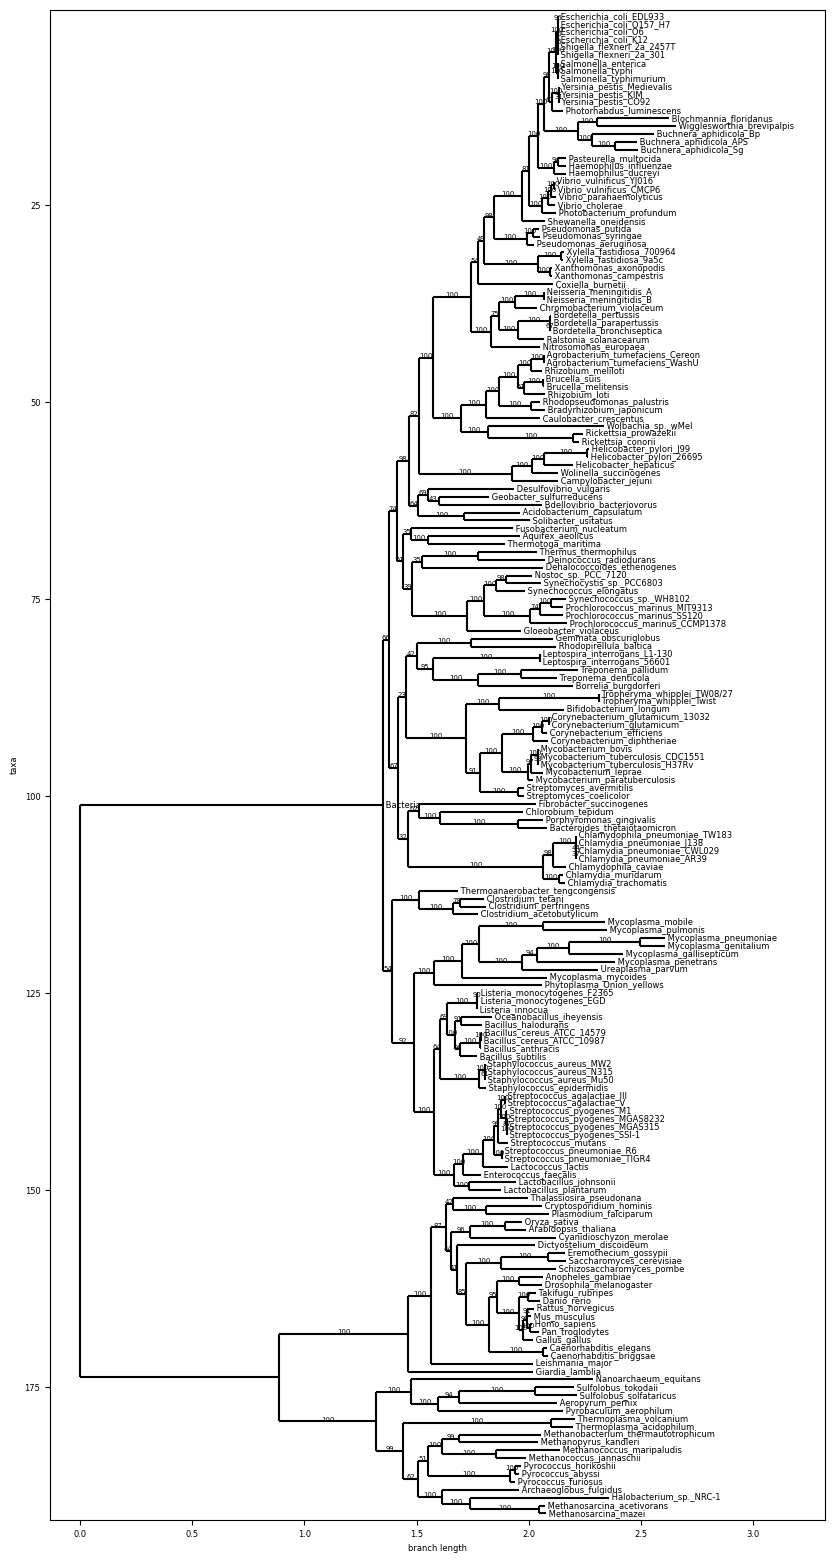

In [5]:
plot_tree(tree, show=True)

### 1.4 saves the tree image in raster format (png) and vector (svg / pdf) (you can use pylab.savefig, for example) (pictures 	sendagain);

In [6]:
plot_tree(tree, out_file='tree.png')
plot_tree(tree, out_file='tree.svg')

### 1.5 change the format to phyloxml and writes in a file

In [7]:
Phylo.write(tree, "tree.xml", "phyloxml")

1

## PART 1. ETE

### 1.1 read the same tree using ETE

In [8]:
tree = get_tree('https://www.jasondavies.com/tree-of-life/life.txt', ete=True)

### 1.2 cut from a tree a random set of 42 (or other number) leaves. Use the “prune” function.

In [9]:
leaves = tree.get_leaves()
tree.prune([leaves[randint(0, len(leaves) + 1)].name for _ in range(42)])

### 1.3 draw the pruned tree

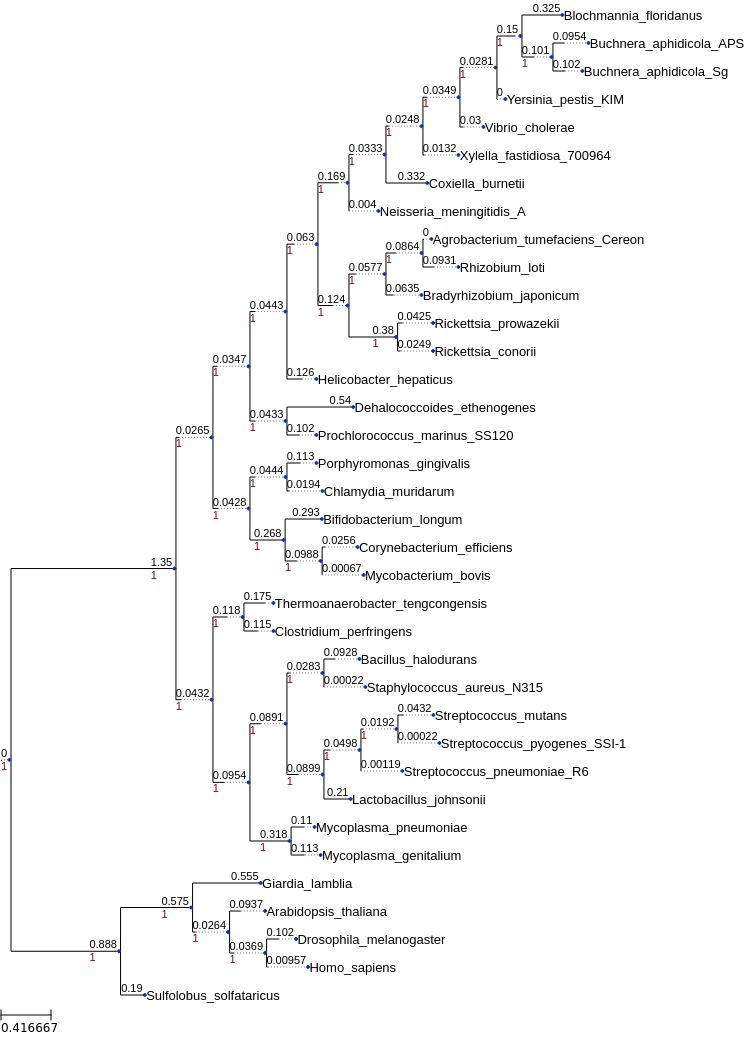

In [10]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
ts.scale =  120
tree.render(file_name='%%inline', tree_style=ts)

### 1.4 Draws the pruned tree with additional aesthetic processing

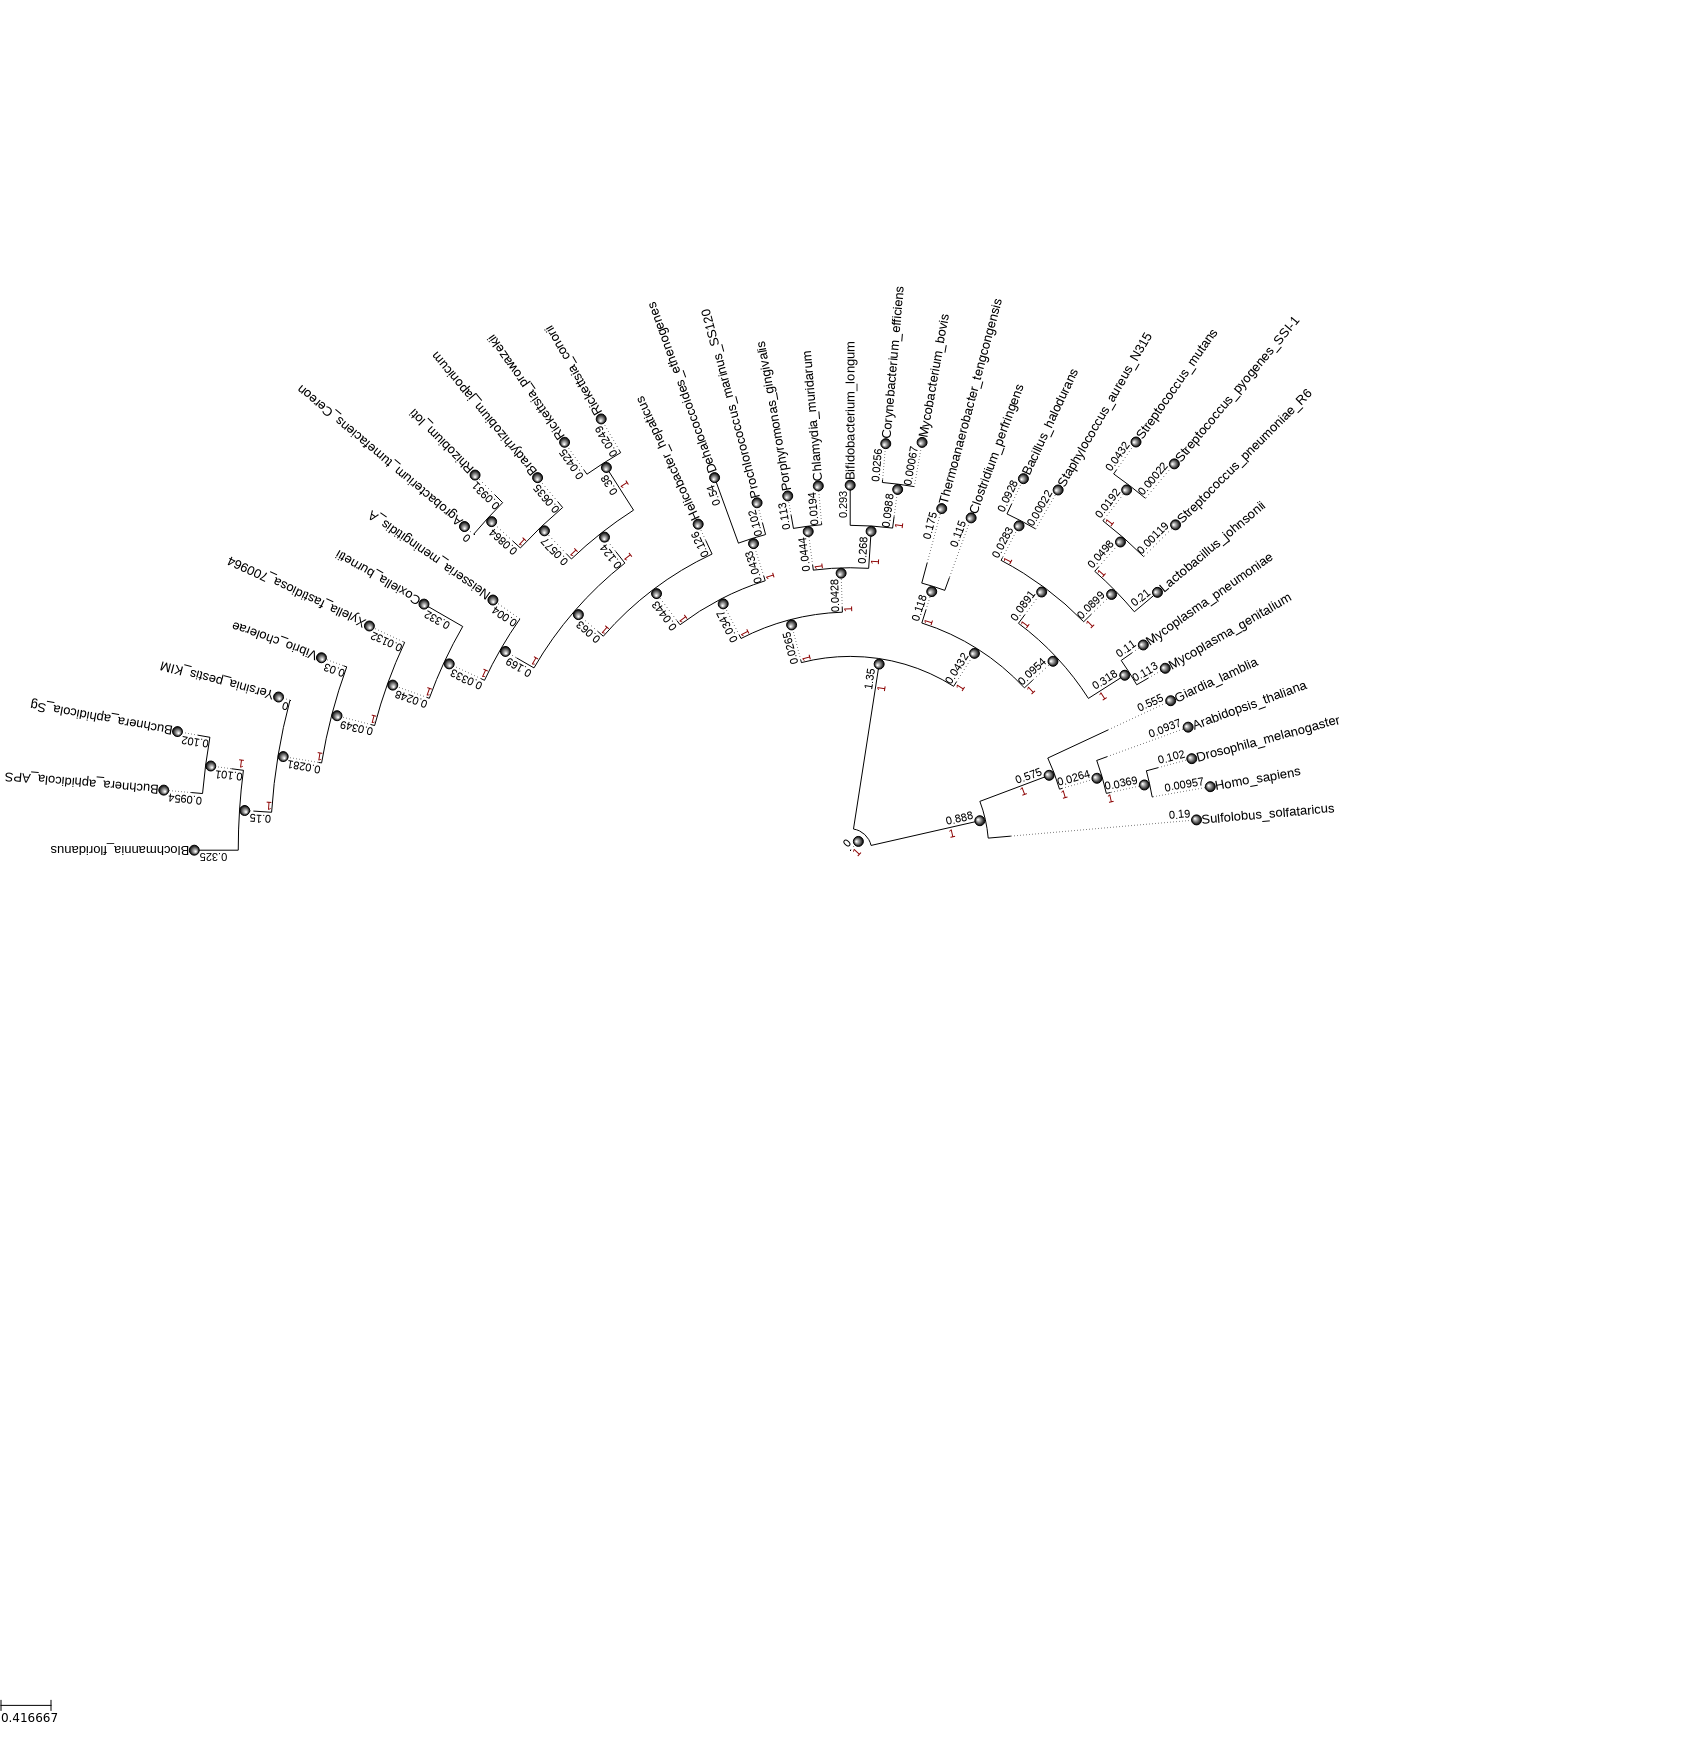

In [11]:
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
ts.scale =  120
ts.mode = "c"
ts.arc_start = -180 
ts.arc_span = 180
nstyle = NodeStyle()
nstyle["shape"] = "sphere"
nstyle["size"] = 10
nstyle["fgcolor"] = "black"
for n in tree.traverse():
    n.set_style(nstyle)
tree.render(file_name='%%inline', tree_style=ts)

## PART 2

### 2.1 queries the base of nucleotide sequences for all sequences according to the name of the gene MKI67 for the organism Homo sapiens and returns xml

In [12]:
gene = entrez_gene('homo[ORGN] MKI67')

/home/marina/anaconda3/envs/biopy/lib/python3.8/site-packages/Bio/Entrez/__init__.py:656: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(


In [13]:
gene

{'Count': '49', 'RetMax': '20', 'RetStart': '0', 'IdList': ['1890263052', '1675069958', '1519315735', '1519246095', '1519245506', '1519243472', '1435213226', '1034568323', '1034568322', '568815596', '568815595', '568815593', '568815588', '568815586', '568815583', '568815579', '1701945985', '1701108622', '1700660549', '1026191091'], 'TranslationSet': [{'From': 'homo[ORGN]', 'To': '"Homo"[Organism]'}], 'TranslationStack': [{'Term': '"Homo"[Organism]', 'Field': 'Organism', 'Count': '27678340', 'Explode': 'Y'}, {'Term': 'MKI67[All Fields]', 'Field': 'All Fields', 'Count': '3226', 'Explode': 'N'}, 'AND'], 'QueryTranslation': '"Homo"[Organism] AND MKI67[All Fields]'}

### 2.2 return a table with UID (in XML this field is called Id), accession number (in XML this field is called Caption), sequence length (Slen);

In [14]:
f"Let's run this one using gene id {gene['IdList'][0]}"

"Let's run this one using gene id 1890263052"

In [15]:
entrez_summary(gene['IdList'][0])

,Id,Caption,Length
1890263052,1890263052,NM_001172425,1917


### 2.3 return the nucleotide sequences in fasta format and writes to the file

In [16]:
fasta = get_fasta(gene['IdList'][0])

/home/marina/anaconda3/envs/biopy/lib/python3.8/site-packages/Bio/Entrez/__init__.py:656: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  warnings.warn(


In [17]:
with open(f"{gene['IdList'][0]}.fasta", 'w') as out_f:
    out_f.write(fasta)

### 2.4 Download all sequences from the paper with a given PMID: 12890024

In [18]:
seq = Entrez.efetch(db="nucleotide", id="12890024", rettype='fasta', retmode="fasta").read()

In [19]:
seq

'>AZ769660.1 1M0570P06R Mouse 10kb plasmid UUGC1M library Mus musculus genomic clone UUGC1M0570P06 R, genomic survey sequence\nTCTGGCTCGTTCCTCTGAAAACAAGGATTGCACAGAGTCATTTTTAAAGAATCTATTCATTTTTGAATTT\nTCCCTCCAATAACACCTTCAGTTCTCTCTGTACCATTTCCCACAGNAGGAAGAAAATAGTATGTATTTGT\nCCCATTCTTCTGTGCTGTGCTCATGTGCTATGAACATGTGTGCACATACATGTGGAGGTGTCAGGACTCA\nGCCTCCGCCACTCTTCTAGCTTATTTAGTGAGGCAGGGTCTTCCTGCAAACCCTAGAGCTCACCAATACA\nGCTCGTCTTGCCAGCCAGCTTGCTCTGGGAATTTCCTGTCTCTGCCTTC\n\n'